In [1]:
import logging
import backtrader as bt
from datetime import datetime

from Commissions import CommInfo_Futures_Perc_Mult
from Parser import parse_args
from Datasets import *
from strategies import StochMACD
from utils import print_sqn, print_trade_analysis

def runstrat(args=None):
    leverage = 5
    
    cerebro = bt.Cerebro(optreturn=False, runonce=False)
    cerebro.broker.set_shortcash(False)
    cerebro.broker.set_cash(5000)
    cerebro.broker.setcommission(commission=0.00015, leverage=leverage)

    dataname = DATASETS.get('btc_hourly')
    data = bt.feeds.GenericCSVData(
        dataname=dataname,
#         fromdate=datetime(2019,9,9),
        fromdate=datetime(2021,4,1),
        todate=datetime(2021,5,1),
        timeframe=bt.TimeFrame.Minutes,
        nullvalue=0.0,
        datetime=0,
        open=4,
        high=5,
        low=6,
        close=7,
        volume=8,
        compression=60,
        headers=True,
    )
    
#     dataname2 = DATASETS.get('btc_minute')
#     data2 = bt.feeds.GenericCSVData(
#         dataname=dataname2,
# #         fromdate=datetime(2019,9,9),
#         fromdate=datetime(2021,1,1),
#         todate=datetime(2021,6,1),
#         timeframe=bt.TimeFrame.Minutes,
#         nullvalue=0.0,
#         datetime=0,
#         open=4,
#         high=5,
#         low=6,
#         close=7,
#         volume=8,
#         compression=1,
#         headers=True,
#     )

#     cerebro.resampledata(data2, timeframe=bt.TimeFrame.Minutes, compression=60)
    cerebro.adddata(data)

    cerebro.addobserver(bt.observers.Value)
    
    cerebro.addstrategy(StochMACD, 
        macd1=9,
        macd2=21,
        macdsig=8,
        atrdist=5,
        reversal_sensitivity=19,
        leverage=leverage,
        loglevel=logging.WARNING,
    )

    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="ta")
    cerebro.addanalyzer(bt.analyzers.SQN, _name="sqn")

    initial_value = cerebro.broker.getvalue()
    print('Starting Portfolio Value: %.2f' % initial_value)
    result = cerebro.run()

    # Print analyzers - results
    final_value = cerebro.broker.getvalue()
    print('Final Portfolio Value: %.2f' % final_value)
    print('Profit %.3f%%' % ((final_value - initial_value) / initial_value * 100))
    print_trade_analysis(result[0].analyzers.ta.get_analysis())
    print_sqn(result[0].analyzers.sqn.get_analysis())
    
    return cerebro

cerebro = runstrat()


Starting Portfolio Value: 5000.00
Final Portfolio Value: 4554.40
Profit -8.912%
Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               0              1              0              1              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               0              0              1              -445.6         
SQN: 0


<IPython.core.display.Javascript object>


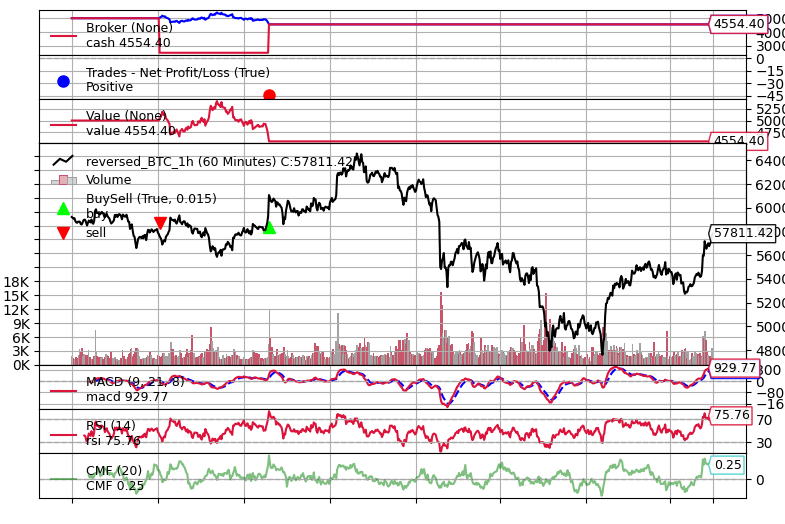

[[<Figure size 640x480 with 8 Axes>]]

In [2]:
cerebro.plot()

<IPython.core.display.Javascript object>


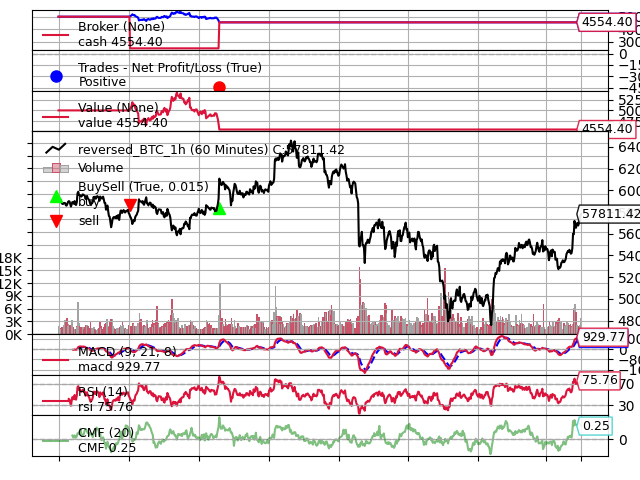

[[<Figure size 640x480 with 8 Axes>]]

In [3]:
cerebro.plot()